## Machine Learning Workflow

Asking the right question --> Preparing Data --> Selecting the algorithm --> Training the model --> Testing the Model

Letting a **specific data** teach our Algorithm to create a **specific Prediction** Model. If data changes, we need to retrain our algorithm.

### Asking the Right question

Using the Machine Learning Workflow, to process and transform PRIMA INDIAN data to create a prediction model. This model must predict with 70% or more accuracy which people are likely to develop diabetes.


Prediction means Supervised learning algorithm.

### Preparing Data
Tidy datasets are easy to manipulate, model and visualize, and have a specific structure.

Each vairable is a column

Each observation is a row

Each type of obvervational unit is a table

#### 50-80% time in ML project is spent on getting, organizing and cleaning data.

## Data Rules

1. Closer the data is to what we are predicting, the better.

2. Data will never be in the format we need.


## Where is the data

From UCI Machine Learning repository. pima-data.csv

# Let's start

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

### Load and Review PIMA Data

In [6]:
df = pd.read_csv('pima-data.csv')
df.shape

(768, 10)

In [8]:
df.head(6)

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin,diabetes
0,6,148,72,35,0,33.6,0.627,50,1.3790,True
1,1,85,66,29,0,26.6,0.351,31,1.1426,False
2,8,183,64,0,0,23.3,0.672,32,0.0000,True
3,1,89,66,23,94,28.1,0.167,21,0.9062,False
4,0,137,40,35,168,43.1,2.288,33,1.3790,True
5,5,116,74,0,0,25.6,0.201,30,0.0000,False


### Check if any value is null

In [11]:
df.isnull().values.any()

False

## Check for correlation

([<matplotlib.axis.YTick at 0x116b49150>,
 <a list of 10 Text yticklabel objects>)

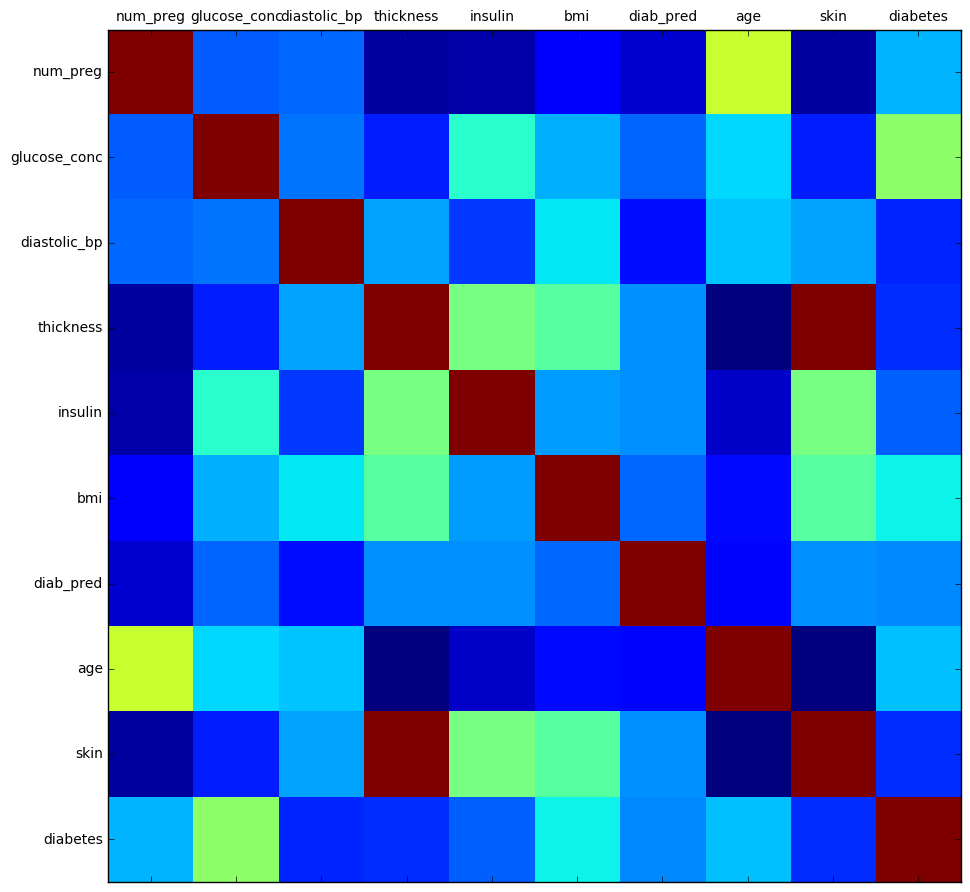

In [22]:
size = 11

corr = df.corr()
fig, ax = plt.subplots(figsize=(size,size))

ax.matshow(corr)

plt.xticks(range(len(corr.columns)), corr.columns)
plt.yticks(range(len(corr.columns)), corr.columns)

### Dark Red patch shows that skin and thickness are rather similar or correlated. Why would we want 2 things which essentially give us the same information?

Skin and Thickness are the same actually. Let us delete one.

In [33]:
df['skin'].head()


0    35
1    29
2     0
3    23
4    35
Name: thickness, dtype: int64

In [34]:
df['thickness'].head()

0    35
1    29
2     0
3    23
4    35
Name: thickness, dtype: int64

In [37]:
del df['skin']

KeyError: 'skin'

In [38]:
df.head()

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,True
1,1,85,66,29,0,26.6,0.351,31,False
2,8,183,64,0,0,23.3,0.672,32,True
3,1,89,66,23,94,28.1,0.167,21,False
4,0,137,40,35,168,43.1,2.288,33,True


#### Let us now check the datatypes
Diabetes is in boolean. Let us change that to 1's and 0's

In [39]:
diabetes_map = {True:1, False:0}
df['diabetes'] = df['diabetes'].map(diabetes_map)
df.head()

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## Checking for representation

We need to make sure that each factors are represented in a noble amount. Like, if the number of false diabetes cases are too much, it doesn't make sense to use this data for accurately predicting a model!'

In [59]:
diab_true = len(df.loc[df['diabetes'] == 1])
diab_false = len(df.loc[df['diabetes'] == 0])

In [60]:
diab_false #False Well represented?
diab_true #True Well represented?

268

## We've prepared our data! Now we need an algorithm to train the data.

We could say that Algorithm is the engine that drives the process.

### Let us check 3 sample Algorthms
## Naive Bayes
1. Bayes Theorem
2. Based on likelihood and probability
3. Has an assumption - Each feature that we're passing are independent of each other and make equal impact.
4. In our case, this means that BP is as significant as bmi, age and others.
5. Needs small amount of Data to train.

1. Simple, easy to understand
2. Fast. (Other complex algorithms take 100x times the time)
3. Stable algorithm

## Logistic Regression

1. Returns a binary result
2. Measures the relationship of each features and weighs them based on their impact on the result.
3. Resultant value is mapped against a curve with 2 values, 1 and 0 - equivalent to diabetes or no diabetes in our case.

## Decision Tree
1. Binary Tree structure
2. Each Node contains decision. Each node decides if we want to go one way or another.
3. It requires significant amount of data to determine nodes and their splits.
4. Easy to follow along how train model works (because of visualization)

## How to decide on algorithms?

### Learning Type

1. Learning Type


We are trying to create a prediction model. So it's a *Supervised Algorithm*
2. Result Type


*Regression* (Continuous values) v/s *Classification* (discrete). We need discrete values (Diabetic or not?)

3. Complicated Algorithm


Ensemble(multiple/complex) can be avoided - difficult to comprehend, multiple child algorithms, difficult to debug


## Training Overview

Prepared data is split into two. One for Training and other for Test. Training data is passed onto a training algorithm which produces a train model based on the logic in the algorithm

**We train algorithm using training data and use test data to validate it. If we use test data also to train, the training algorithm would be familiar with this data and know it's biases. So we'd have a model which we think is accurate but might fail when we feed it with real world data with another set of biases.**

----------------------------------------------------------------------------------------------------------------------
### Splitting the Data
70% Training 30% Testing


In [99]:
from __future__ import division
from sklearn.cross_validation import train_test_split

featured_col_names = ['num_preg', 'glucose_conc', 'diastolic_bp', 'thickness', 'insulin', 'bmi', 'diab_pred', 'age']
predicted_class_names = ['diabetes']


x = df[featured_col_names].values #Predictor containing feature columns
y = df[predicted_col_names].values #Predicted class column

split_test_size = 0.30 #Give split as 30% for test

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=split_test_size, random_state=666)

len(y_train[:])

537

In [94]:
len(x_train)/len(df.index) * 100 

69.921875

In [95]:
len(x_test)/len(df.index) * 100 

30.078125

In [100]:
df.head()

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [110]:
print len(df.loc[df['glucose_conc'] == 0])
print len(df.loc[df['diastolic_bp'] == 0])

5
35


## Post split data modification

Wow. Seems like there are lots of hidden 0 values here! What to do now?
We shall Do **imputing**

### Imputing Options
1. Replace with Mean, Median
2. Replace with expert knowledge derived value

### Using Mean Imputing

In [113]:
from sklearn.preprocessing import Imputer

fill0 = Imputer(missing_values=0, strategy="mean", axis=0) # axis=0 means column

x_train = fill0.fit_transform(x_train)
x_test = fill0.fit_transform(x_test)

## Training Algorithm using Naive Bayes

In [114]:
from sklearn.naive_bayes import GaussianNB

#create Gaussian Naive Bayes model object and train it with Data
nb_model = GaussianNB()

nb_model.fit(x_train, y_train.ravel())

GaussianNB()

## Checking Accuracy - Performance on training Data


In [116]:
#Use training data to predict the model
nb_predict_train = nb_model.predict(x_train)

from sklearn import metrics # performance metrics library

metrics.accuracy_score(y_train, nb_predict_train) #Accuracy

0.75046554934823095

## Checking Accuracy - Performance on testing Data


In [119]:
#Use testing data to predict the model
nb_predict_test = nb_model.predict(x_test)

from sklearn import metrics # performance metrics library

metrics.accuracy_score(y_test, nb_predict_test) #Accuracy

0.75324675324675328

## Performance Improvement Options

1. Adjust current algorithm. Certain Algorithms lets us tune them using parameters called hyper parameters. Unfortunately Naive Bayers doesn't allow us hyper paramteres.
2. Get more data or improve data
3. Improve training
4. Switch algorithm

### Random Forest
1. Ensemble Algorithm
2. Fits multiple trees with subsets of Data
3. Average tree results to improve performance and control overfitting

In [121]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(random_state=989)
rf_model.fit(x_train, y_train.ravel())

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=989, verbose=0, warm_start=False)

## Predicting Training Data


In [122]:
rf_predict_train = rf_model.predict(x_train)
metrics.accuracy_score(y_train, rf_predict_train)

0.97765363128491622

## Predicting Testing Data


In [123]:
rf_predict_test = rf_model.predict(x_test)
metrics.accuracy_score(y_test, rf_predict_test)

0.75324675324675328

In [125]:
metrics.confusion_matrix(y_test, rf_predict_test, labels=[1,0]) 

array([[ 40,  35],
       [ 22, 134]])

In [128]:
print(metrics.classification_report(y_test, rf_predict_test, labels=[1,0]))

             precision    recall  f1-score   support

          1       0.65      0.53      0.58        75
          0       0.79      0.86      0.82       156

avg / total       0.74      0.75      0.75       231



### As we can see, training data precision is really high while the testing data precision is low.

This happens mainly because our model is used to seeing the training data and has adapted to it. 

** Suppose the equation for the model is y=x1 + w2x^2 + w3x^8 **

Model creates a very definitive decision boundary between the negative and positive values.

Classic example of ** Overfitting. **



**Overfitting** is 
1. Good fit for Training Data
2. Poor fit for Test Data

Fixing **Overfitting**
1. Tuning hyperparamters - Regularization hyperparamter
Gives the developer to tweak/ control the corner cases of the training data.

**y=x1 + w2x^2 + w3x^8 - [f(w)/ lambda]**

Here Lambda is an example for Regularization hyperparameter.


Values presented by the training data are dampened by the Regularization.


*This might reduce the accuracy on the trained data but might increase the accuracy of the trained model on Future Data.*

## Logistic Regression


In [131]:
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression(C=0.7, random_state=999)
lr_model.fit(x_train, y_train.ravel())

lr_predict_test = lr_model.predict(x_test)

metrics.confusion_matrix(y_test, lr_predict_test, labels=[1,0])


array([[ 38,  37],
       [ 16, 140]])

In [132]:
print(metrics.classification_report(y_test, lr_predict_test, labels=[1,0]))

             precision    recall  f1-score   support

          1       0.70      0.51      0.59        75
          0       0.79      0.90      0.84       156

avg / total       0.76      0.77      0.76       231

